In [224]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import pandas as pd
import seaborn as sns
import seaborn as sb 
 
#Import Data
world_2021 = pd.read_csv('../data/2021.csv')
world_df = pd.read_csv('../data/world_happiness.csv')
geo_temp = world_2021

#Renaming Column Names
world_df.rename(columns={'Country name': 'Country'}, inplace=True)
world_df.rename(columns={'Life Ladder': 'Score'}, inplace=True)
world_2021.rename(columns={'Country name': 'Country'}, inplace=True)


In [225]:
# Which countries were the happiest in 2021?
happiest_df = world_2021[['Country', 'Score']].head()
happiest_df


,Country,Score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


In [226]:
geo_temp

,Country,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [227]:
# Which countries were the unhappiest 2021?
unhappiest_df = world_2021[['Country', 'Score']].tail()
unhappiest_df

,Country,Score
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145
148,Afghanistan,2.523


In [228]:
happiest_unhappiest_countries = world_2021[world_2021["Country"].isin([
                                                                'Finland', 
                                                                'Denmark',
                                                                'Switzerland',
                                                                'Iceland',
                                                                'Netherlands',
                                                                'Lesotho',
                                                                'Botswana',
                                                                'Rwanda',
                                                                'Zimbabwe',
                                                                'Afghanistan'
                                                                ])]

happiest_unhappiest_countries.sort_values(by='Score', ascending=False).set_index('Country')


,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [229]:
graphing_happies_unhappiest = happiest_unhappiest_countries[['Country', 'Score']]
# .set_index('Country name')
graphing_happies_unhappiest


,Country,Score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145
148,Afghanistan,2.523


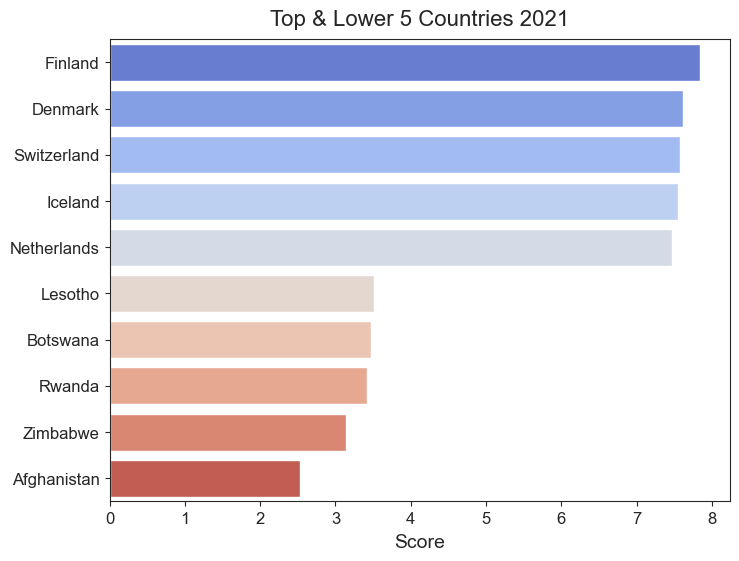

In [230]:
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Score', y='Country', data=graphing_happies_unhappiest, palette='coolwarm')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top & Lower 5 Countries 2021", fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

plt.show()


In [231]:
correlation_df = geo_temp[['Score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
correlation_df.corr()

,Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


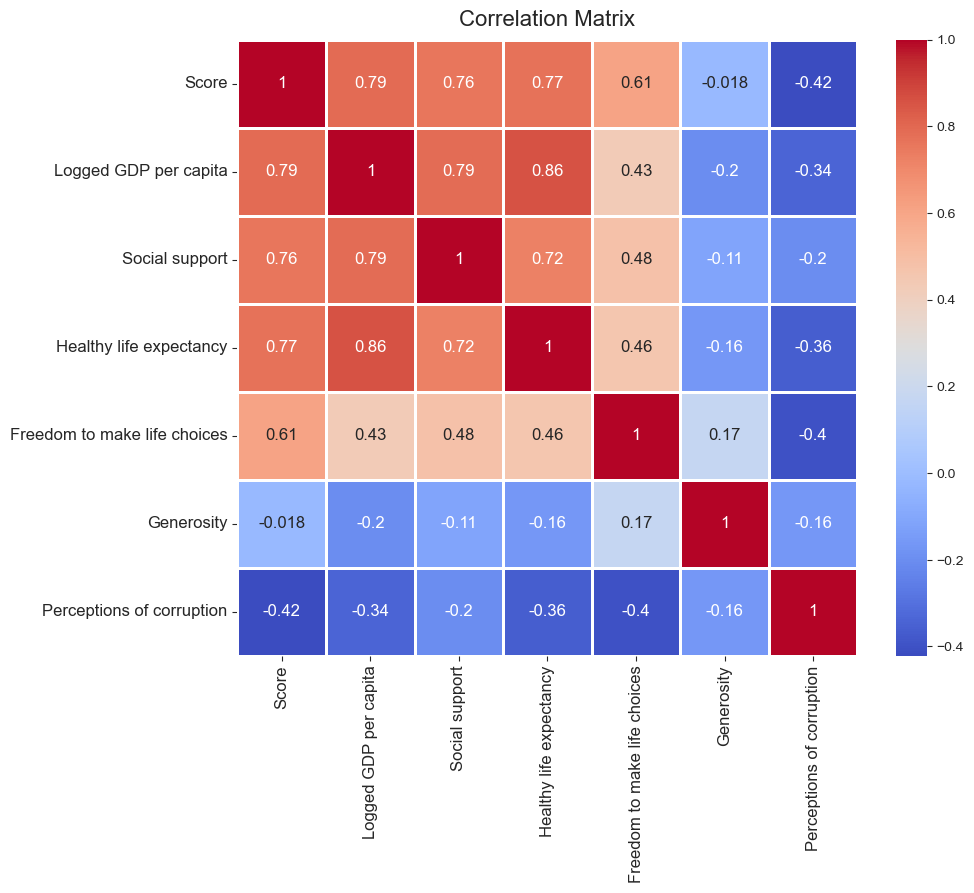

In [232]:
#Setting Figure Size & Color
plt.figure(figsize = (10,8))
cmap = sns.color_palette("coolwarm", as_cmap=True)

#Plotting
ax = sns.heatmap(correlation_df.corr(), cbar=True, annot=True, annot_kws={"size":12},
                                cmap=cmap, linewidths=1, linecolor='white')

plt.title('Correlation Matrix', fontsize = 16, pad=10)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()


In [233]:
#Does money buy happiness?
top_capita = geo_temp.sort_values(by='Logged GDP per capita', ascending=False).head(10)
top_capita



,Country,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
14,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
18,United States,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.920,68.200,0.837,0.098,0.698,2.43,1.533,1.030,0.621,0.554,0.252,0.154,2.807
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


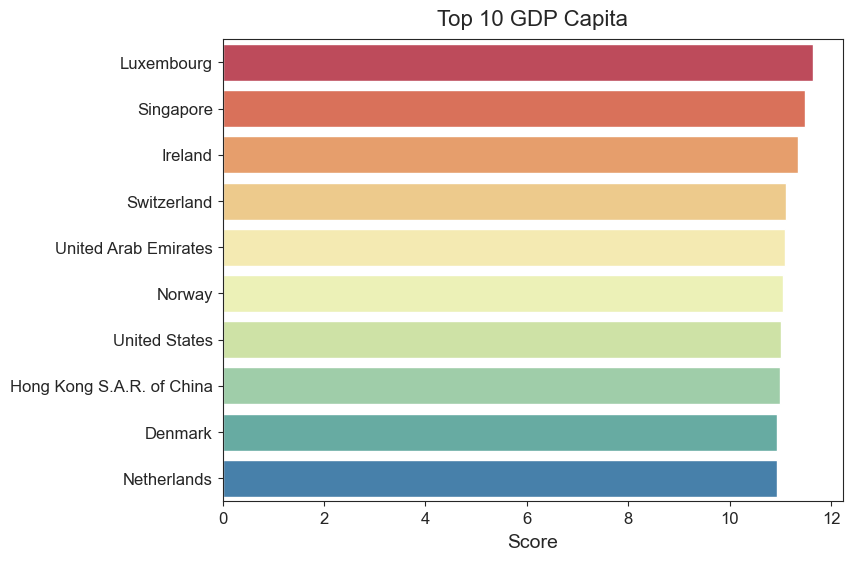

In [234]:

# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Logged GDP per capita', y='Country', data=top_capita, palette='Spectral')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top 10 GDP Capita", fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

plt.show()

In [235]:
#Does money buy happiness?
#Does money buy happiness?
top_social = geo_temp.sort_values(by='Social support', ascending=False).head(10)
top_social


,Country,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
44,Kazakhstan,Commonwealth of Independent States,6.152,0.047,6.243,6.060,10.155,0.952,65.200,0.853,-0.069,0.733,2.43,1.230,1.103,0.527,0.573,0.143,0.132,2.446
28,Slovenia,Central and Eastern Europe,6.461,0.043,6.546,6.376,10.529,0.948,71.400,0.949,-0.101,0.806,2.43,1.360,1.093,0.722,0.690,0.122,0.085,2.388
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.400,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
14,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124


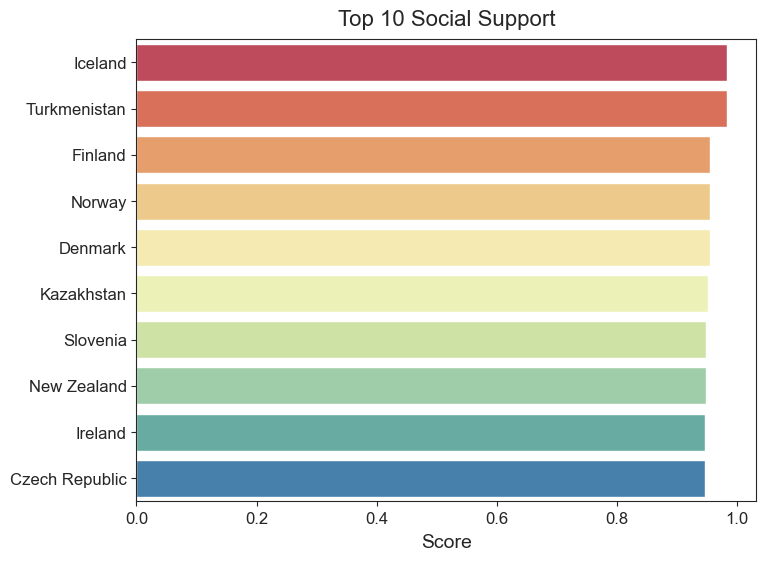

In [237]:

# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Social support', y='Country', data=top_social, palette='Spectral')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top 10 Social Support", fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

plt.show()

In [ ]:
Nato_countries = world_df[world_df["Country"].isin([
                                                                'Belgium', 
                                                                'Canada',
                                                                'Denmark',
                                                                'France',
                                                                'Germany',
                                                                'Hungary',
                                                                'Iceland',
                                                                'Italy',
                                                                'Netherlands',
                                                                'Poland',
                                                                'Romania',
                                                                'United States'
                                                                ])]

Nato = Nato_countries[['Country', 'year', 'Score']]
Nato



In [ ]:
#graph
world_2021.describe()

In [ ]:
world_2021

In [ ]:
# What are the factors contributing to happiness?
world_2021.info()

In [ ]:
Afghanistan_df = world_df.loc[(world_df["Country"] == "Afghanistan")]
Afghanistan_df



In [ ]:
China_df = world_df.loc[(world_df["Country"] == "China")]
China_df

# NO PERCEPTION OF CORRUPTION. NO DATA IS DATA!!

In [ ]:
Russia_df = world_df.loc[(world_df["Country"] == "Russia")]
Russia_df

In [ ]:
Ukraine_df = world_df.loc[(world_df["Country"] == "Ukraine")]
Ukraine_df

In [ ]:
Current_events_df = world_df.loc[(world_df["Country"] == "Afghanistan")]
Current_events_df

In [ ]:
# #counts the number of results in each column
# for column in world_df.columns:
#      print("\n" + column)
#      print(world_df[column].value_counts())

In [ ]:

Adversaries_df = world_df[world_df["Country"].isin(['China', 'Russia'])]
Adversaries_df



In [ ]:
Middle_East_df = world_df[world_df["Country"].isin(['Afghanistan', 'Iran', 'Iraq', 'Israel', 'Saudi Arabia', 'Egypt', 'Jordan', 'Kuwait', 'Qatar', 'United Arab Emirates'])].groupby(['Country']).mean()
Middle_East_df.drop(['year', 'Positive affect', 'Negative affect'], axis=1)


In [ ]:
#Nato Countries
world_2021 = world_df.loc[(world_df['year']>2008)]
world_2021 = pd.pivot_table(world_2021, values='Score', index=['year'], columns=['Country'])

safety = world_2021.copy()

In [ ]:
background_color = "#fafafa"
low_c = '#dd4124'
high_c = '#009473'
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150, facecolor=background_color)
ax.set_facecolor(background_color) 

plt.rcParams["font.family"] = "monospace"

colors = [low_c,'gray','gray',high_c]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

list_of_contries = ['Netherlands','Iceland','United States','Canada','Denmark','Germany','Belgium','France','Italy','Poland','Romania','Hungary']
series_of_contries = pd.Series(list_of_contries)

sns.heatmap(world_2021[list_of_contries].T, 
            square=True,
            linewidth=5, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True,annot_kws={"size": 8})

ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='monospace',size=12)
plt.xticks(rotation=0,fontfamily='monospace', size=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(0,.00,'United Nations through the years',fontweight='normal',fontsize=17,color='#323232')


plt.show()

In [ ]:
happiness_mean = geo_temp['Score'].mean()
geo_temp['lower_happy'] = geo_temp['Score'].apply(lambda x: 0 if x < happiness_mean else 1)


In [ ]:
# Source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

import matplotlib.colors
import geopandas
import pycountry

# Appending column "CODE" to reflect the Countries abbreviation. 

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE


# Creating the column
geo_temp['CODE']=alpha3code(geo_temp.Country)
geo_temp.head()


In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge=pd.merge(world,geo_temp,on='CODE')

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [low_c,high_c])

ax = world.plot(figsize=(20,15), linewidth=0.25, edgecolor=background_color, color='lightgray')
ax.axis('off')
ax.set_facecolor(background_color)
merge.plot(column='lower_happy',figsize=(20, 15),legend=False,cmap=cmap,ax=ax)


ax.text(-175,112,"Let's zoom out",fontsize=30,fontweight='bold',color='#323232')
ax.text(-175,102,'We clearly see where the happy & unhappy countries are',color='gray',fontfamily='monospace',fontsize=20)

plt.show()